In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']

In [5]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [6]:
print(f"intercept: {linreg.intercept_}")
print(f"slope: {linreg.coef_}")

intercept: 0.45931464523595267
slope: [0.20299973]


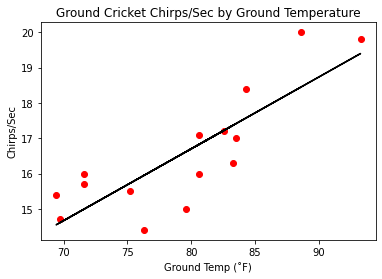

In [7]:
plt.scatter(x, y, color = 'red')
plt.plot(x, linreg.predict(x), color='black')
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [8]:
print(f"Rsq: {linreg.score(x, y)}")

Rsq: 0.6922946529146998


In [9]:
linreg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])

In [10]:
(18 - linreg.intercept_) / linreg.coef_

array([86.40743135])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [11]:
df = pd.read_fwf("brain_body.txt")

In [12]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [13]:
x = df['Brain']
x = x.to_frame()
y = df['Body']

In [14]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [15]:
print(f"intercept: {linreg.intercept_}")
print(f"slope: {linreg.coef_}")

intercept: 91.00439620740687
slope: [0.96649637]


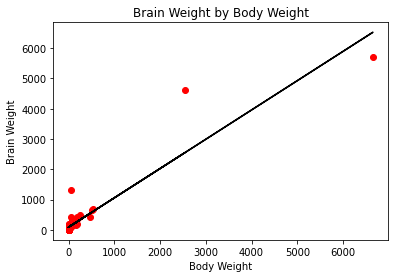

In [16]:
plt.scatter(x, y, color='red')
plt.plot(x, linreg.predict(x), color='black')
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()


In [17]:
print(f"Rsq: {linreg.score(x, y)}")

Rsq: 0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [18]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [19]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [20]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [21]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [22]:
def linreg(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [23]:
linreg(salary_discrim_cols, df)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [24]:
def linreg_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [25]:
print('R^2: {}'
      .format(linreg_focus(salary_discrim_cols, df)))

R^2: 0.8547180674410969


In [26]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [27]:
combos = get_combos(salary_discrim_cols)

In [30]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[linreg_focus(list(n), df, focus)] = n
    return combo_scores

In [31]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 'YSdeg')),
 (0.5782019226431887, (

**R^2:** 0.8547180674410969 is the best score  

In [32]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
Sex,52.0,0.269231,0.447888,0.0,0.00,0.0,1.00,1.0
Rank,52.0,2.038462,0.862316,1.0,1.00,2.0,3.00,3.0
Year,52.0,7.480769,5.507536,0.0,3.00,7.0,11.00,25.0
Degree,52.0,0.653846,0.480384,0.0,0.00,1.0,1.00,1.0
YSdeg,52.0,16.115385,10.222340,1.0,6.75,15.5,23.25,35.0
Salary,52.0,23797.653846,5917.289154,15000.0,18246.75,23719.0,27258.50,38045.0


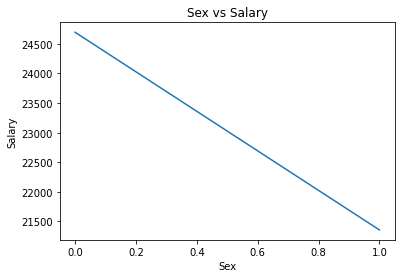

In [33]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

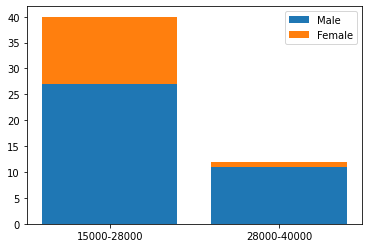

In [34]:
plt.figure()
labels = ['15000-28000', '28000-40000']
x = np.arange(len(labels))
Malegroup = df[df["Sex"]==0]["Salary"]
Femalegroup = df[df["Sex"]==1]["Salary"]
df['group1'] = pd.cut(Malegroup, bins = [15000,28000,40000], include_lowest = True)
df['group2'] = pd.cut(Femalegroup, bins = [15000,28000,40000], include_lowest = True)
group1 = df.groupby(by = 'group1').size()
group2 = df.groupby(by = "group2").size()
bars1 = [group1[0],group1[1]]
bars2 = [group2[0],group2[1]]
plt.bar(x, bars1, label = 'Male')
plt.bar(x, bars2, bottom=bars1, label = 'Female')
plt.legend()
plt.xticks(x, labels)
plt.show()

In [35]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


**Sex has no influence over salary**

In [36]:
X = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values 
y = df['Salary'].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,477.505951
Rank,4663.425905
Year,2426.269626
Degree,125.360914
YSdeg,-496.033054


In [44]:
regressor.coef_

array([ 477.50595147, 4663.42590492, 2426.26962626,  125.36091402,
       -496.03305395])

In [45]:
regressor.intercept_

23655.90243902439

In [46]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


In [49]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6623158614875558
